# ML1 Final Project
[Dataset link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

**Dataset**: Includes 2,111 observations with 17 dietary and physical lifestyle features from Colombia, Peru, and Mexico.

- **Age**: Age of the person in years

- **Gender**: Male/Female
- **Height**: in meters
- **Weight**: in kilograms
- **family_history_with_overweight**: Binary—Yes (family has obesity history), No (no obesity history).
- **FAVC (High-Calorie Food Consumption)**: Binary—Yes (frequent intake), No (low intake).
- **FCVC (Vegetable Intake Frequency)**: More than 2 means vegetables in every meal; 2 or less means not in every meal.(scale from 1 to 3)
- **NCP (Main Meals per Day)**: Number of main meals consumed daily.
- **CAEC (Sub-Meal Frequency)**: Four levels— No, Sometimes, Frequently, Always.
- **SMOKE (Smoking Status)**: Binary—Yes (smokes), No (never smoked).
- **CH2O (Water Intake)**: Amount of daily water intake in liters.
- **SCC (Calorie Monitoring)**: Binary—Yes (monitors calorie intake), No (does not monitor).
- **FAF (Physical Activity Frequency)**: Frequency of physical activity.(scale from 0 to 3)
- **TUE (Technology Use)**: Time spent on technological devices.(scale from 0 to 2)
- **CALC (Alcohol Intake)**: Binary—Yes (drinks alcohol), No (does not drink alcohol).
- **MTRANS (Means of Transportation)**: Five levels—Automobile, Motorbike, Bike, Public Transportation, Walking.
- **NObeyesdad (Target variable)**: 7 levels- Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III


## Import important libraries

In [59]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
df = pd.read_csv("train.csv")
df.shape

(20758, 18)

## EDA

In [61]:
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [63]:
df['NObeyesdad'].value_counts()/len(df)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64

In [64]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values
for col in df.columns:
        print('*'*50)
        print(col)
        print(f"number of non numeric values:{len(non_numeric_values(df,col))}")
        print("*"*50)
        print(non_numeric_values(df,col))
        print()
    

**************************************************
id
number of non numeric values:0
**************************************************
set()

**************************************************
Gender
number of non numeric values:2
**************************************************
{'Female', 'Male'}

**************************************************
Age
number of non numeric values:1
**************************************************
{'.'}

**************************************************
Height
number of non numeric values:1
**************************************************
{'.'}

**************************************************
Weight
number of non numeric values:1
**************************************************
{'.'}

**************************************************
family_history_with_overweight
number of non numeric values:2
**************************************************
{'no', 'yes'}

**************************************************
FAVC
number of non numeric va

In [67]:
df[df['TUE'].astype(str).str.contains(r'[^0-9.]', regex=True)]

id Gender        Age   Height      Weight  \
833      833   Male  19.000000  1.85000  155.872093   
10246  10246   Male  25.883749  1.77219  114.133149   

      family_history_with_overweight FAVC      FCVC  NCP       CAEC SMOKE  \
833                              yes  yes  3.000000  3.0  Sometimes    no   
10246                            yes  yes  2.442536  3.0  Sometimes    no   

           CH2O SCC       FAF       TUE       CALC                 MTRANS  \
833    3.000000  no  3.000000  0.000073  Sometimes  Public_Transportation   
10246  2.101841  no  1.266866  0.000073  Sometimes  Public_Transportation   

            NObeyesdad  
833     Obesity_Type_I  
10246  Obesity_Type_II

In [68]:
df.describe(include="object").T

count unique                    top   freq
Gender                          20758      2                 Female  10422
family_history_with_overweight  20758      2                    yes  17014
FAVC                            20758      2                    yes  18982
CAEC                            20758      4              Sometimes  17529
SMOKE                           20758      2                     no  20513
SCC                             20758      2                     no  20071
CALC                            20758      3              Sometimes  15066
MTRANS                          20758      5  Public_Transportation  16687
NObeyesdad                      20758      7       Obesity_Type_III   4046

In [69]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [70]:
def outliers_summary(df):
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    Q1 = df[numerical_columns].quantile(0.15)
    Q3 = df[numerical_columns].quantile(0.85)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

    outlier_counts = outliers_mask.sum(axis=0)

    total_rows = df.shape[0]
    outlier_percentage = (outlier_counts / total_rows)*100

    outliers_summary = pd.DataFrame({
        "Number of Outliers": outlier_counts,
        "Outlier Percentage": outlier_percentage
    })

    return outliers_summary.style.background_gradient()
outliers_summary(df)

In [71]:
numerical_features = list(df.select_dtypes('number').columns)
catgorical_features = list(df.select_dtypes('object').columns)
print(f"There are {len(catgorical_features)}, categorical features there are {catgorical_features}")
print(f"There are {len(numerical_features)}, numerical features there are {numerical_features}")

There are 9, categorical features there are ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
There are 9, numerical features there are ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [72]:
def is_negative(df):
    numerical_col = df.select_dtypes(include=['int', 'float']).columns
    for col in numerical_col:
        if df[col][df[col]<0].any():
            print(col,len(df[col][df[col]<0]))
        else:
            print("No negative values")
is_negative(df)

No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values
No negative values


In [73]:
def check_unique(df):
    for col in df.columns:
        print('*'*50)
        print(col)
        print(f"number of unique values:{np.sum(df[col].value_counts())}")
        print()
        print(df[col].unique())

check_unique(df)

**************************************************
id
number of unique values:20758

[    0     1     2 ... 20755 20756 20757]
**************************************************
Gender
number of unique values:20758

['Male' 'Female']
**************************************************
Age
number of unique values:20758

[24.443011 18.       20.952737 ... 25.746113 38.08886  33.852953]
**************************************************
Height
number of unique values:20758

[1.699998 1.56     1.71146  ... 1.791366 1.672594 1.536819]
**************************************************
Weight
number of unique values:20758

[ 81.66995   57.        50.165754 ... 152.063947  79.5       80.615325]
**************************************************
family_history_with_overweight
number of unique values:20758

['yes' 'no']
**************************************************
FAVC
number of unique values:20758

['yes' 'no']
**************************************************
FCVC
number of unique value

In [74]:
df['NObeyesdad'].value_counts()/len(df)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64

## Visualization

### Univariate Analysis
This helps understand the distribution(numerical) and frequency(categorical) of each feature.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


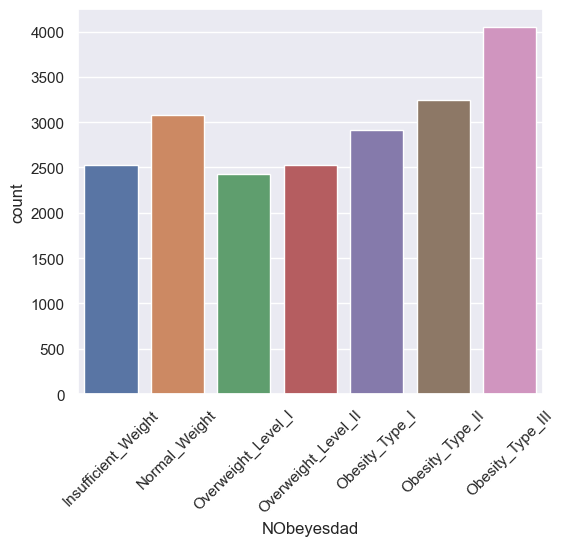

In [75]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
y = df['NObeyesdad']
plt.figure(figsize=(6,5))
plt.xticks(rotation=45)
sns.countplot(df,x='NObeyesdad',order=category_order)
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

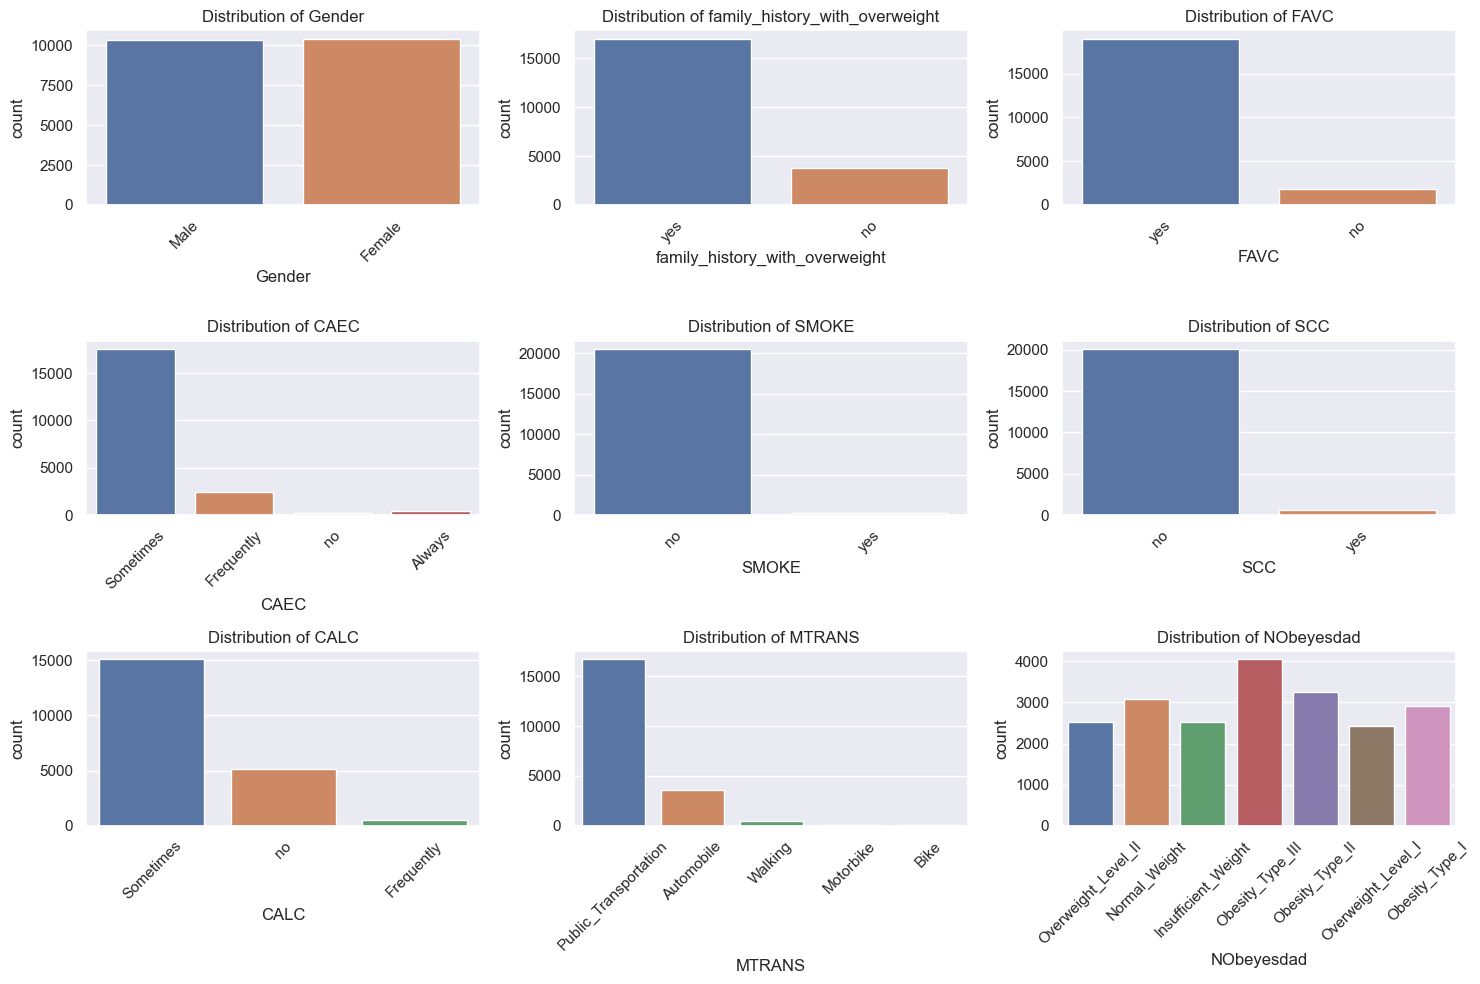

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(catgorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col,palette='Set2');
    plt.xticks(rotation = 45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

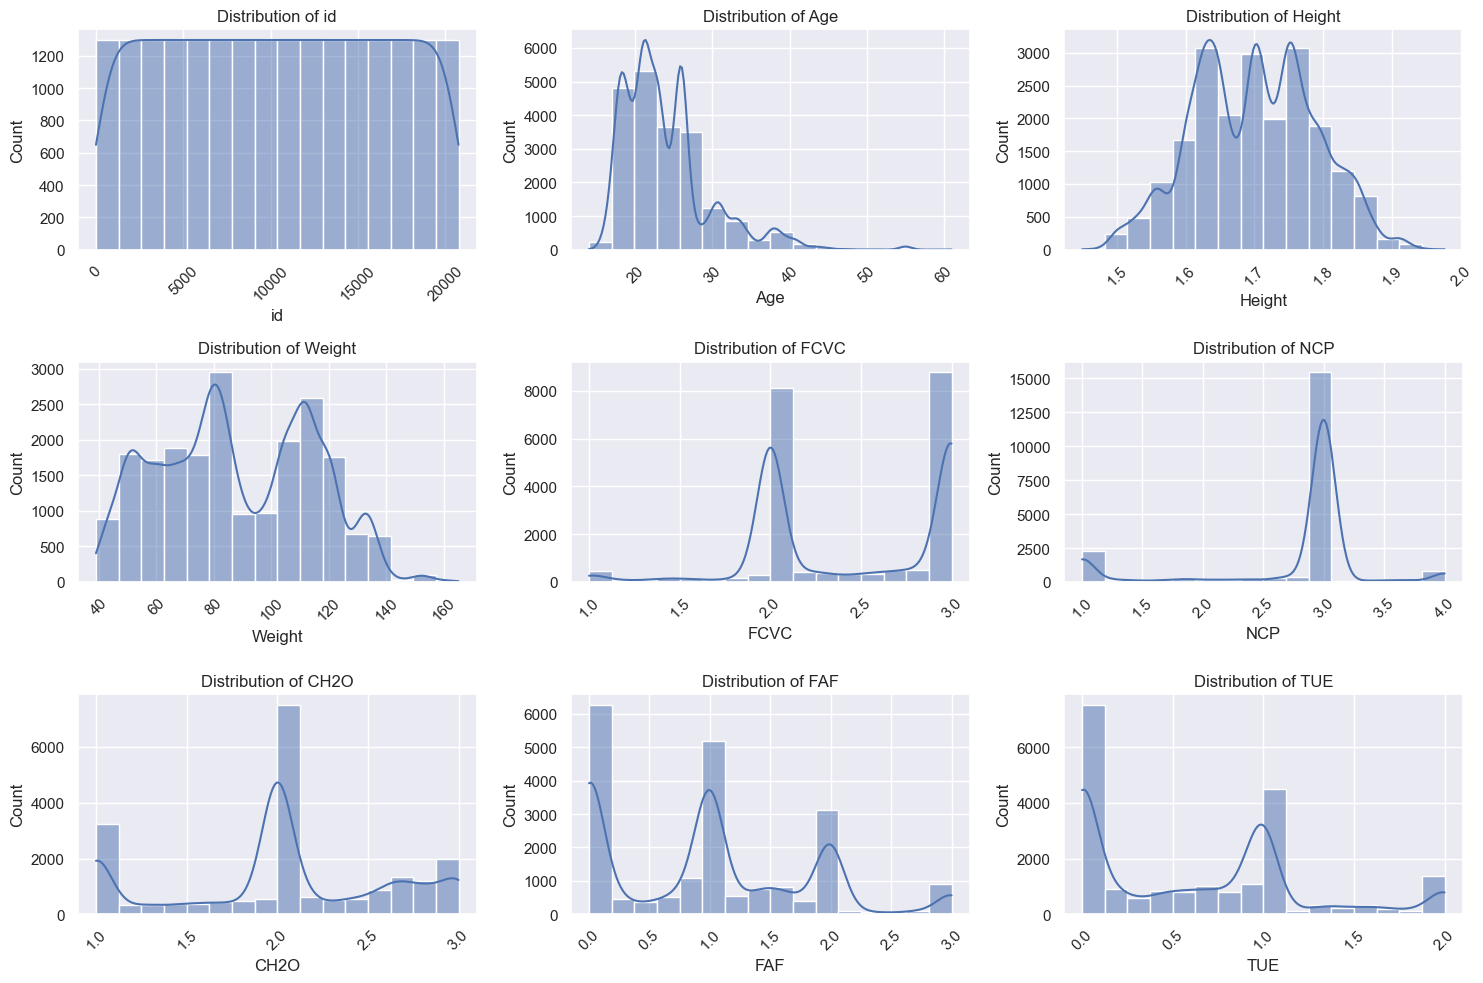

In [77]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True,bins=16);
    plt.xticks(rotation = 45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## bivariate Analysis
This helps understand the relationship between two features


In [78]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

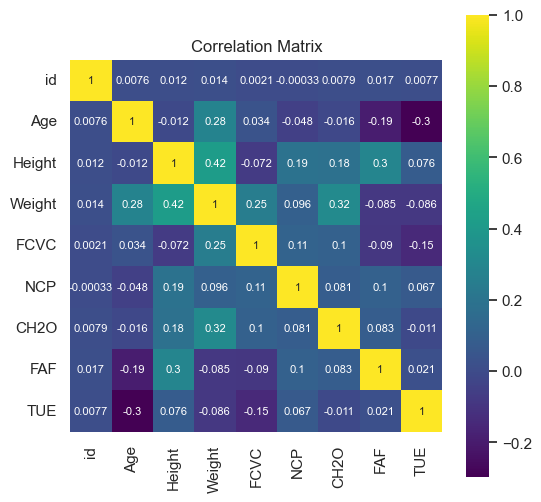

In [79]:
# Correlation matrix for numerical features
plt.figure(figsize=(6, 6))
sns.heatmap(df[numerical_features].corr(),cmap='viridis', annot=True, square=True, annot_kws={"fontsize":8})
plt.title('Correlation Matrix')
plt.show()

**Height & Weight (0.42)**

Insight:

This is a moderate positive correlation—taller individuals tend to weigh more.
This is expected due to natural body proportions.

----------------
Actions:

- Consider calculating BMI (Body Mass Index) = weight (kg) / height² (m²) for better weight-health relationships.
- Check if extreme weight-to-height ratios indicate obesity or malnutrition trends.

In [80]:
df_copy = df.copy()
df_copy["BMI"] = df_copy["Weight"] / (df_copy["Height"] ** 2)
df_copy["BMI"].head()

0    28.259565
1    23.422091
2    17.126706
3    44.855798
4    25.599151
Name: BMI, dtype: float64

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


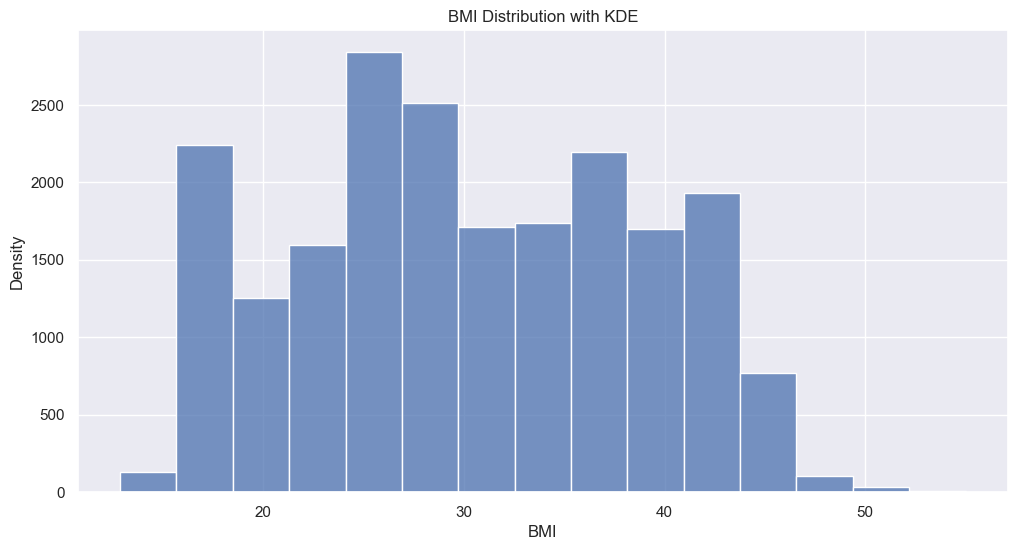

In [81]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
plt.figure(figsize=(12, 6))
sns.histplot(data=df_copy, x="BMI", bins=15);
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


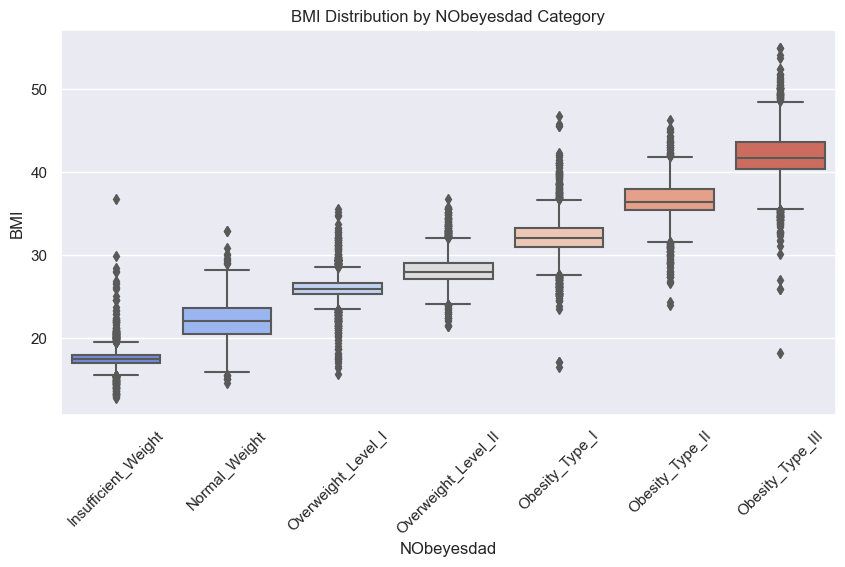

In [82]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
plt.figure(figsize=(10, 5))
sns.boxplot(x="NObeyesdad", y="BMI", data=df_copy, palette="coolwarm",order=category_order)
plt.xticks(rotation=45)
plt.title("BMI Distribution by NObeyesdad Category")
plt.show()

normally BMI should be enough to indicate obesity, but..
some categories overlap -> we need to consider additional features to improve classification.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


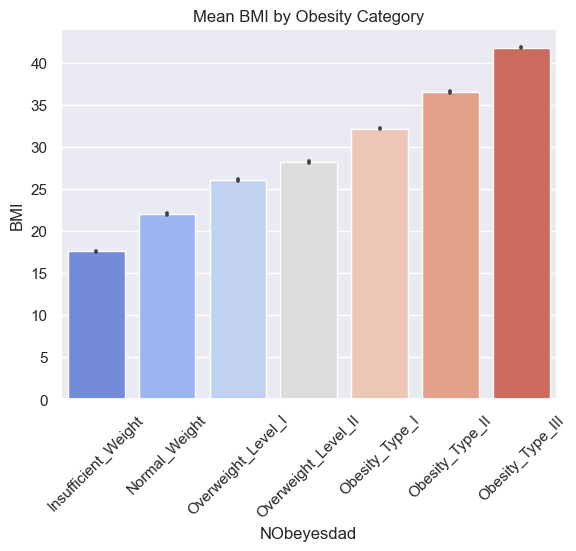

In [83]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
sns.barplot(x="NObeyesdad", y="BMI", data=df_copy, palette="coolwarm", estimator=np.mean,order=category_order)
plt.xticks(rotation=45)
plt.title("Mean BMI by Obesity Category")
plt.show()


**CH2O & Weight (0.32)**

Insight:

People who drink more water tend to have higher weight.

Possible explanations:
Larger-bodied individuals naturally require more water.


---
Actions:

Investigate water intake vs. obesity—is high weight linked to intentional hydration or underlying metabolic needs?
Consider water intake recommendations based on BMI.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='CH2O', ylabel='Weight'>

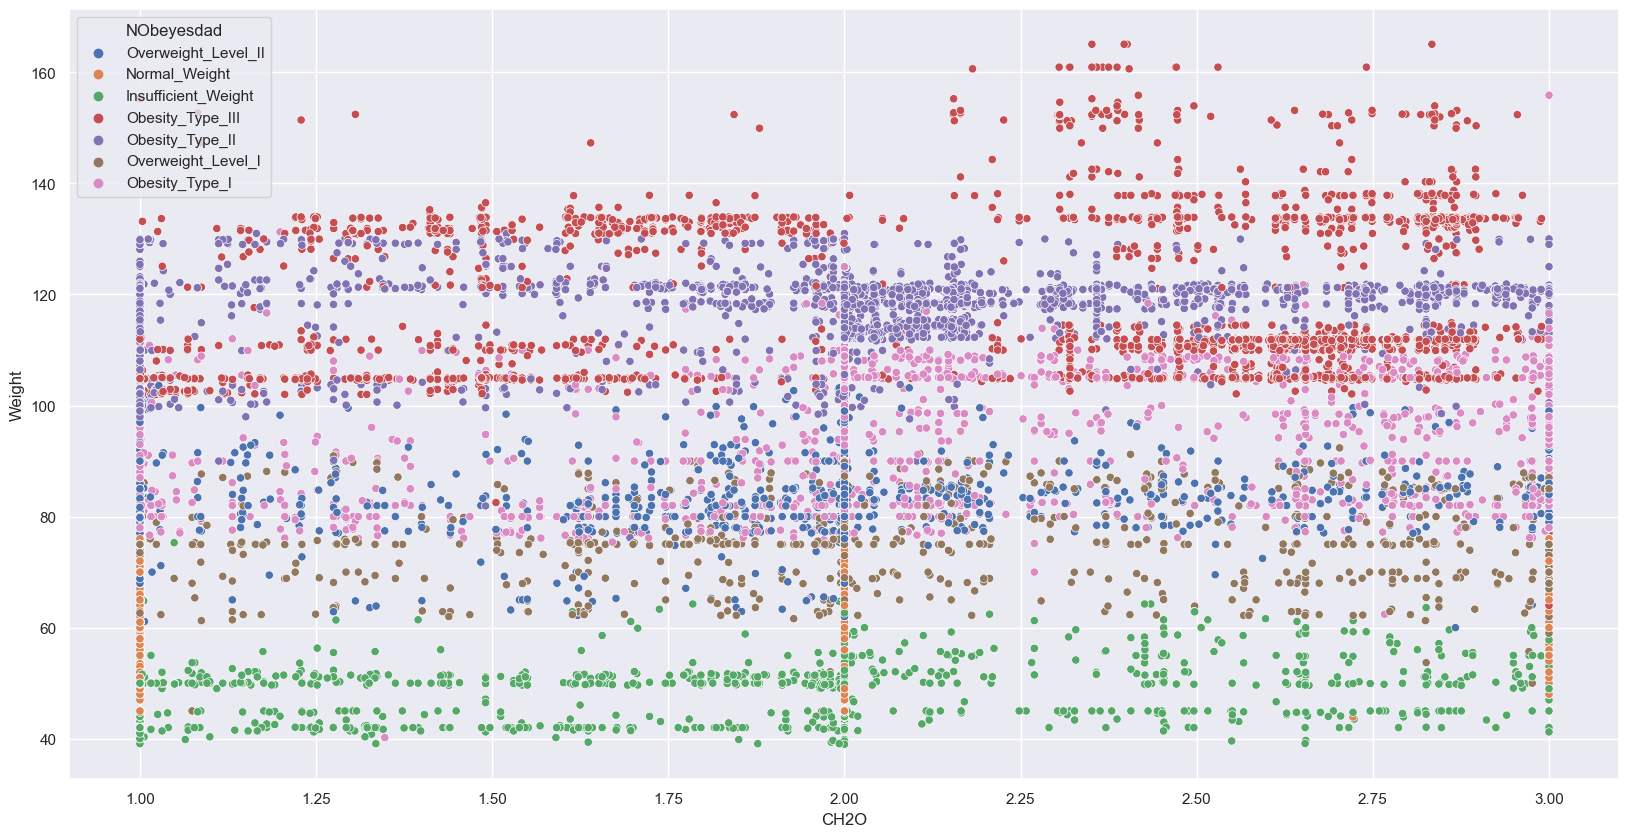

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_copy, x='CH2O',y='Weight',hue='NObeyesdad')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='CH2O', ylabel='BMI'>

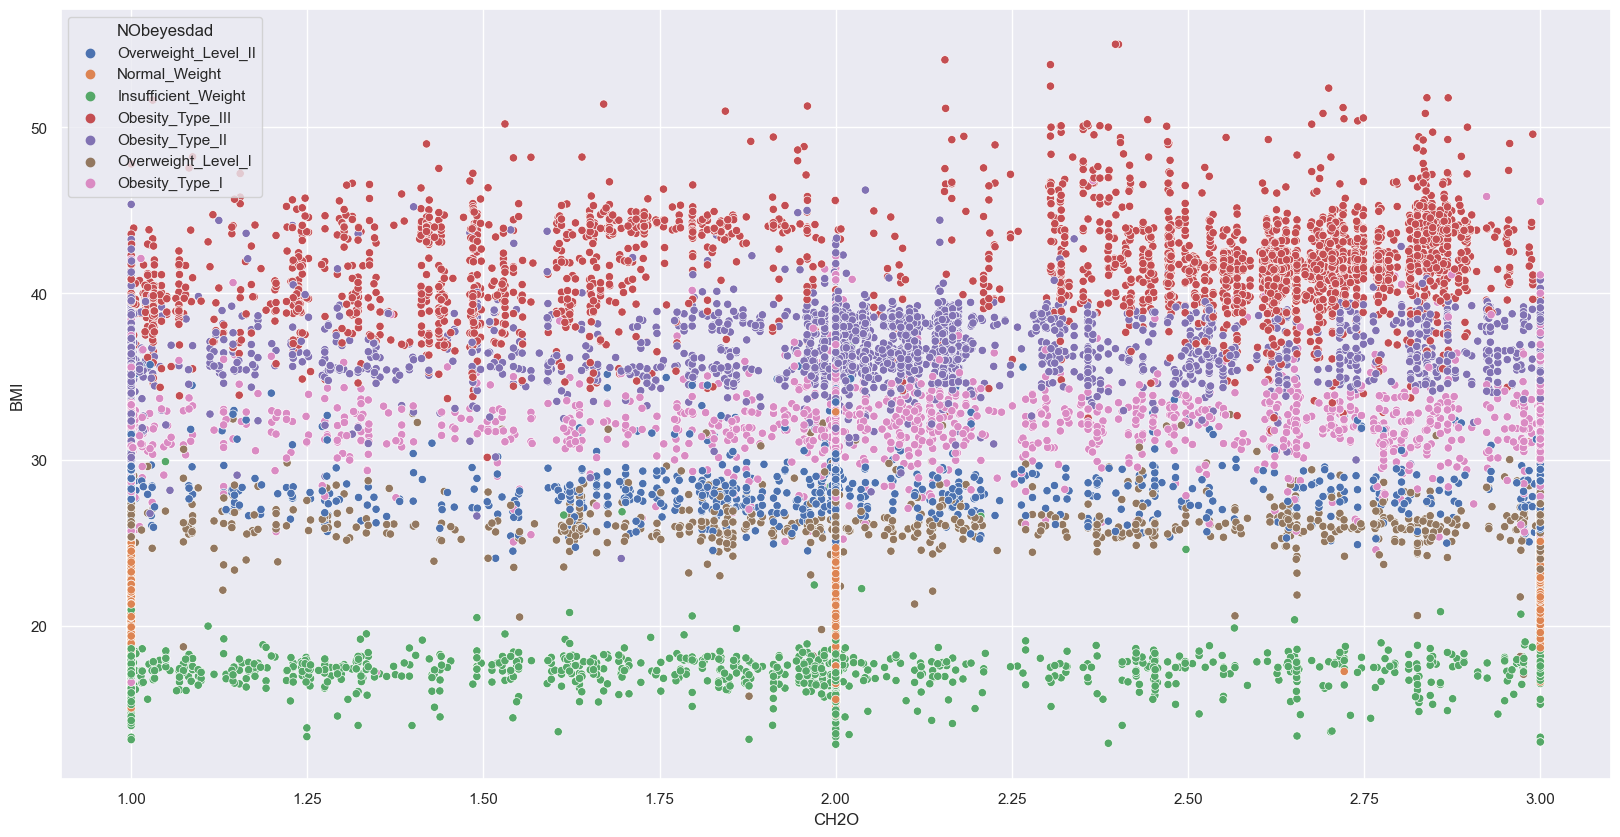

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_copy, x='CH2O',y='BMI',hue='NObeyesdad')

relationship is not clear maybe due to how weight is a different scale than the CH2O that ranges from 1 to 3 letters per day

In [86]:
# simple scaling
df_copy['Weight_simple_scale'] = df_copy['Weight'] / df_copy['Weight'].max()


In [87]:
df_copy['Weight_simple_scale'].describe()

count    20758.000000
mean         0.532468
std          0.159820
min          0.236282
25%          0.399861
50%          0.509307
75%          0.676132
max          1.000000
Name: Weight_simple_scale, dtype: float64

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='CH2O', ylabel='Weight_simple_scale'>

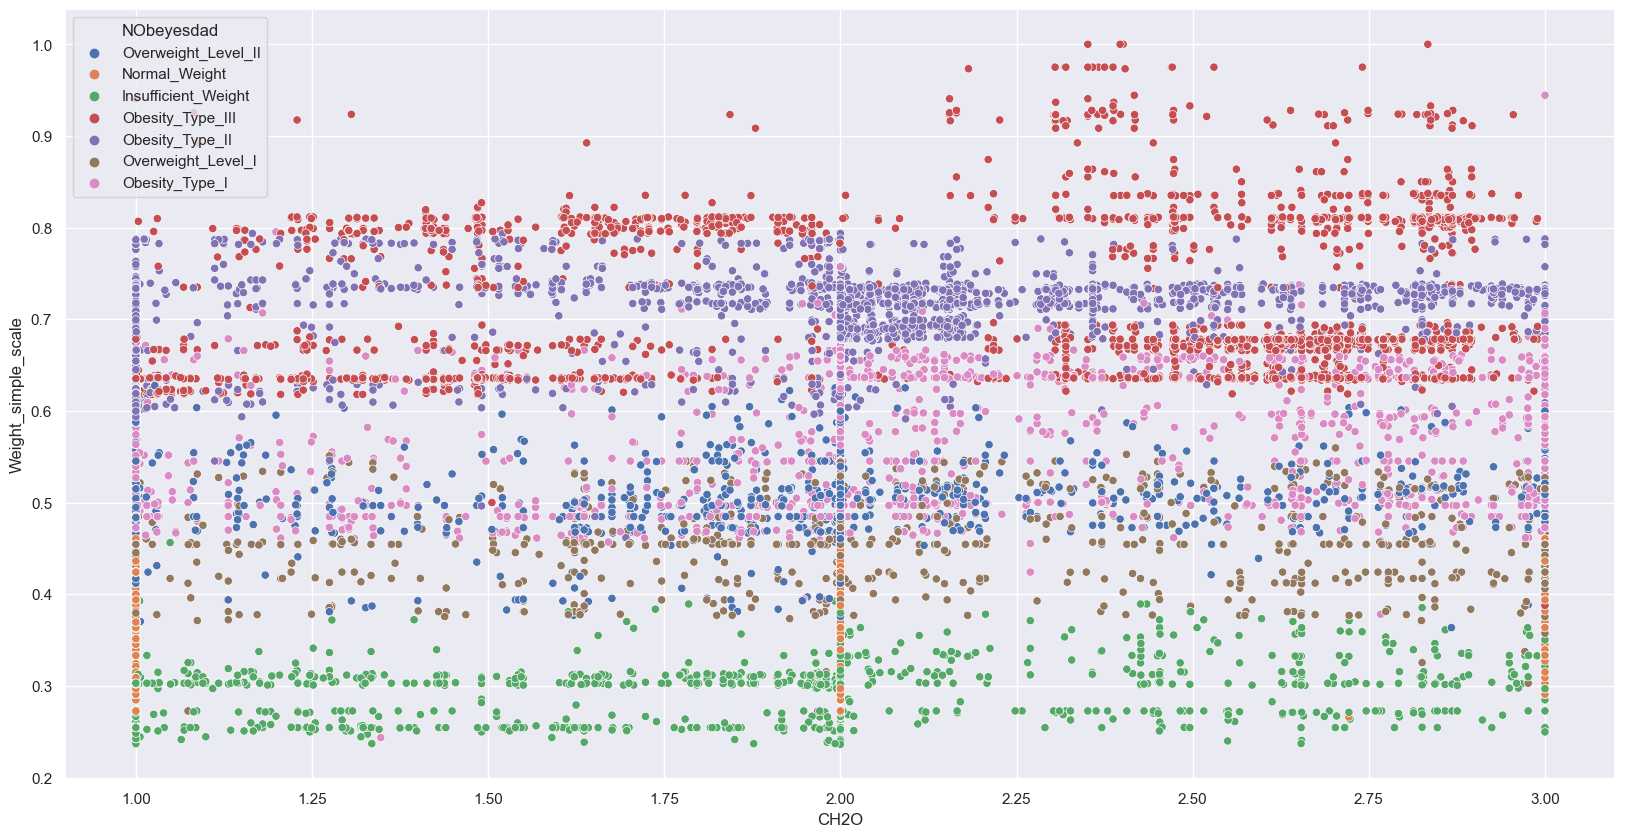

In [88]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_copy, x='CH2O',y='Weight_simple_scale',hue='NObeyesdad')

scale is irrealvant!

maybe take a sample of the data to better see the trend

In [89]:
df_sample = df_copy.sample(n=1000, random_state=42)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='CH2O', ylabel='Weight_simple_scale'>

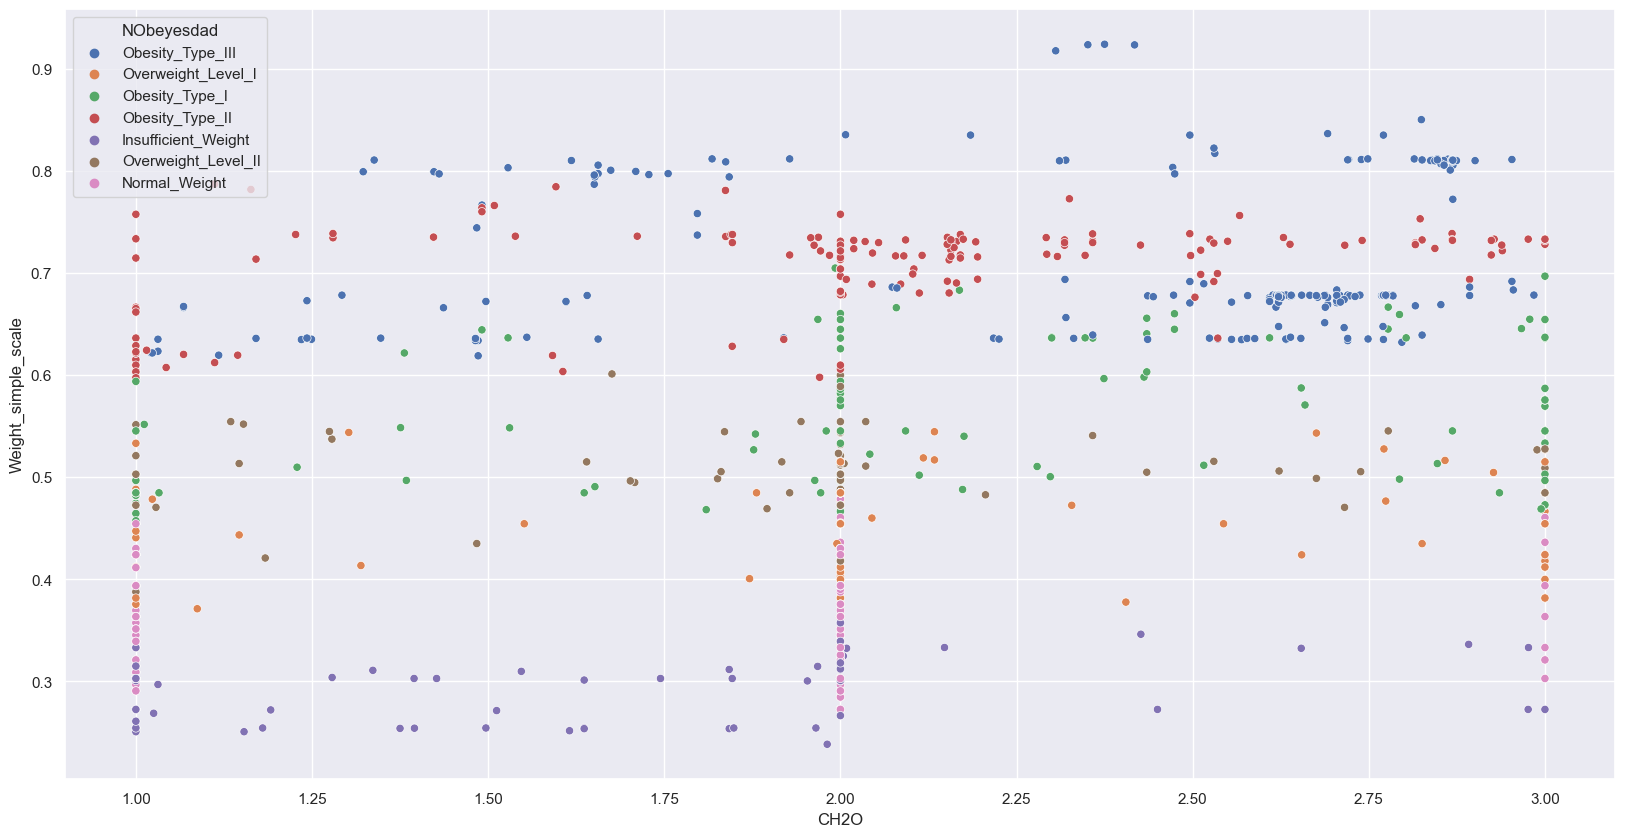

In [90]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_sample, x='CH2O',y='Weight_simple_scale',hue='NObeyesdad')

**Age & Weight (0.28)**
Insight:

Moderate positive correlation—as age increases, weight tends to increase.

Possible reasons:
Metabolic slowdown with age may lead to weight gain if diet remains the same.

----
Actions:

Investigate if higher weight at older ages is due to fat gain or muscle retention.

Study weight trends across different age brackets (e.g., under 30, 30–50, 50+) for targeted health interventions.


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


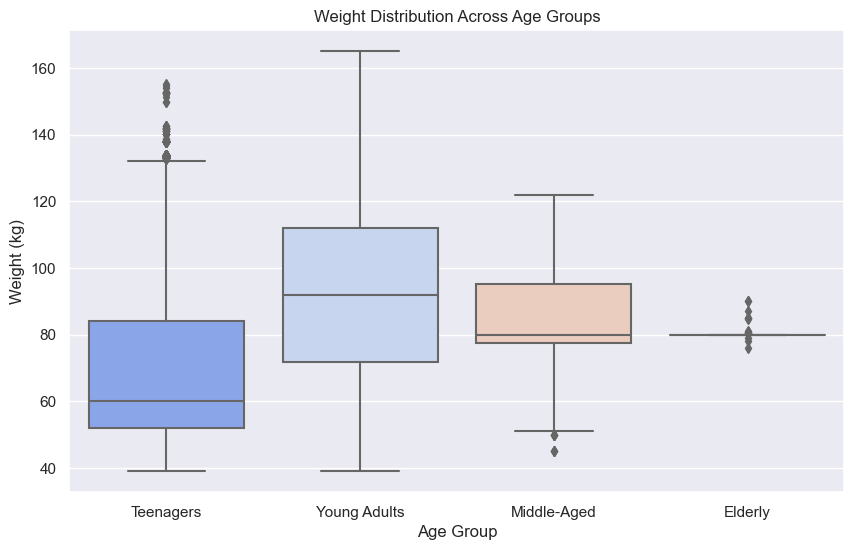

In [91]:
bins = [0, 19, 35, 55, float('inf')] # Age brackets
labels = ['Teenagers', 'Young Adults', 'Middle-Aged', 'Elderly']
df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels, right=False)

# Boxplot of weight distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Weight', data=df_copy, palette="coolwarm")

plt.title("Weight Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Weight (kg)")
plt.show()

**Age & TUE (-0.3)**

Insight:
Younger individuals are more tech-dependent

Likely due to social media, gaming, work, and online activities.
Could indicate sedentary lifestyles in younger groups.

-----------
Actions:

- Segment the analysis by age groups (e.g., teenagers, young adults, middle-aged, elderly) to see if TUE patterns shift significantly.

In [92]:
bins = [0, 19, 35, 55, float('inf')]
labels = ['Teenagers', 'Young Adults', 'Middle-Aged', 'Elderly']
df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


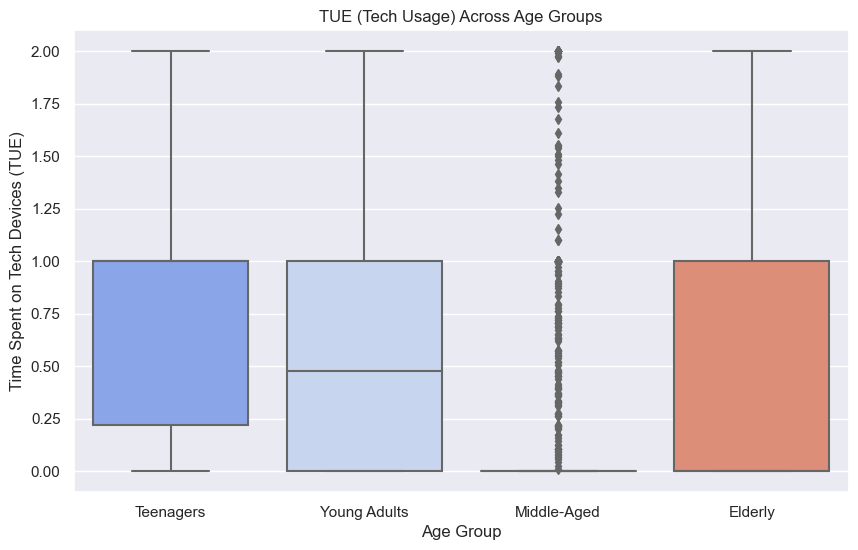

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Age_Group', y='TUE', palette='coolwarm')
plt.title('TUE (Tech Usage) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Time Spent on Tech Devices (TUE)')
plt.show()

The Middle-Aged group has a large number of outliers, suggesting that some individuals spend excessive time on tech devices.

High sedentary tech usage can contribute to reduced physical activity, leading to higher obesity risk in this group.

In [94]:
print(df_copy[['TUE', 'BMI']].corr())  


          TUE       BMI
TUE  1.000000 -0.117098
BMI -0.117098  1.000000


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Overweight_Level_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_I'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

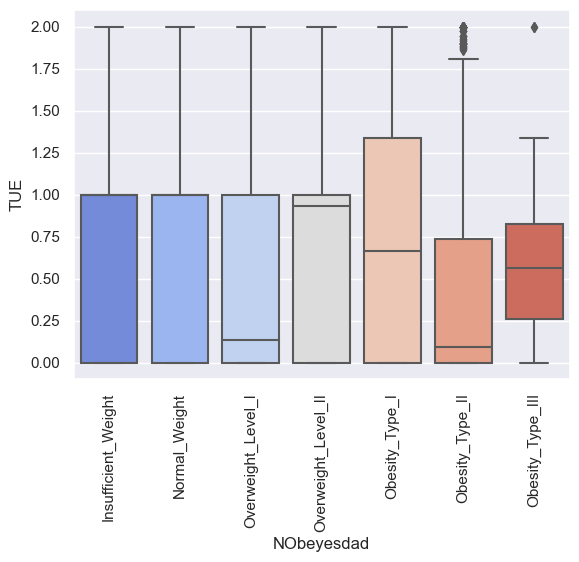

In [95]:
sns.boxplot(x=df_copy['NObeyesdad'], y=df_copy['TUE'], palette="coolwarm",order=category_order)
plt.xticks(rotation=90)


# train-test split

In [363]:
import pandas as pd

def calculate_bmr(weight, height, age, gender, activity_level):
    """
    Calculate BMR using Mifflin-St Jeor Equation and estimate daily calorie needs.
    
    Parameters:
    - weight: Weight in kg
    - height: Height in cm
    - age: Age in years
    - gender: "male" or "female"
    - activity_level: 0 (Sedentary), 1 (Light), 2 (Moderate), 3 (Very Active)
    
    Returns:
    - BMR (Basal Metabolic Rate)
    - TDEE (Total Daily Energy Expenditure)
    """
    
    # BMR Calculation
    if gender.lower() == "male":
        bmr = (10 * weight) + (625 * height) - (5 * age) + 5
    elif gender.lower() == "female":
        bmr = (10 * weight) + (625 * height) - (5 * age) - 161
    else:
        return None, None  # Handle invalid gender gracefully

    # Activity Factor Mapping (Based on FAF scale)
    activity_factors = {0: 1.2, 1: 1.375, 2: 1.55, 3: 1.725}  # Matching your dataset
    
    # Ensure valid activity level
    activity_multiplier = activity_factors.get(activity_level, 1.2)  # Default to sedentary if missing

    # Calculate Total Daily Energy Expenditure (TDEE)
    tdee = bmr * activity_multiplier
    
    return round(bmr, 2), round(tdee, 2)

# Apply to DataFrame
df_copy[['BMR', 'TDEE']] = df_copy.apply(
    lambda row: calculate_bmr(row['Weight'], row['Height'], row['Age'], row['Gender'], row['FAF']),
    axis=1, result_type="expand"
)

# Display results
print(df_copy[['Weight', 'Height', 'Age', 'Gender', 'FAF', 'BMR', 'TDEE']].head())
df_copy.head()

       Weight    Height        Age  Gender       FAF      BMR     TDEE
0   81.669950  1.699998  24.443011    Male  0.000000  1761.98  2114.38
1   57.000000  1.560000  18.000000  Female  1.000000  1294.00  1779.25
2   50.165754  1.711460  18.000000  Female  0.866045  1320.32  1584.38
3  131.274851  1.710730  20.952737  Female  1.467863  2116.19  2539.43
4   93.798055  1.914186  31.641081    Male  1.967973  1981.14  2377.37


id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC  ...       FAF       TUE       CALC  \
0  yes  2.000000  2.983297   Sometimes  ...  0.000000  0.976473  Sometimes   
1  yes  2.000000  3.000000  Frequently  ...  1.000000  1.000000         no   
2  yes  1.880534  1.411685   Sometimes  ...  0.866045  1.673584         no   
3  yes  3.000000  3.000000   Sometimes  ...  1.467863  0.780199  Sometimes   
4  yes  2.679664  1.971472   Sometimes  ...  1.967973  0.931721  Sometimes   

                  MTRANS           NObeyesdad        BMI Weight_simple_scale  \
0  Public_Transportation  Overweight_Level_II  28.259565            0.494798   
1             Automobile        Normal_Weight  23.422091            0.345335   
2  Public_Transportation  Insufficient_Weight  17.126706            0.303929   
3  Public_Transportation     Obesity_Type_III  44.855798            0.795329   
4  Public_Transportation  Overweight_Level_II  25.599151            0.568276   

      Age_Group      BMR     TDEE  
0  Young Adults  1761.98  2114.38  
1     Teenagers  1294.00  1779.25  
2     Teenagers  1320.32  1584.38  
3  Young Adults  2116.19  2539.43  
4  Young Adults  1981.14  2377.37  

[5 rows x 23 columns]

In [480]:
#X = df.drop(columns=['NObeyesdad','id'])
X = df_copy.drop(columns=['NObeyesdad','id','BMI', 'FAF','SMOKE','MTRANS','SCC','Weight_simple_scale'])

y = df_copy['NObeyesdad']

In [481]:
numerical_features = list(X.select_dtypes('number').columns)
catgorical_features = list(X.select_dtypes('object').columns)


In [482]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [483]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())  # Converts categories to numerical values
])

# Column Transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),  # Standard scaling for numerical columns
    ('cat', cat_pipeline, catgorical_features)  # Ordinal encoding for categorical columns
])


In [484]:
x_train_transformed = preprocessor.fit_transform(x_train)

# Convert back to DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=numerical_features + catgorical_features)


In [485]:
x_train_transformed.head()

Age    Height    Weight      FCVC       NCP      CH2O       TUE  \
0 -0.324671  0.114410  0.080848 -0.838072 -2.478371 -0.048656  2.297650   
1  3.028261 -0.685698 -0.411159  1.039585 -2.478371 -0.048656 -1.024744   
2 -1.030552  1.143120 -1.205940 -0.838072  1.753176 -0.048656  0.636453   
3 -1.030552  0.000109 -0.108385 -0.838072  0.342660 -0.048656  0.636453   
4 -0.194908  1.708053  1.278998 -0.176530 -0.080535  0.540600  0.203892   

        BMR      TDEE  Gender  family_history_with_overweight  FAVC  CAEC  \
0  0.381927  0.775216     1.0                             1.0   1.0   2.0   
1 -0.999383 -1.291422     0.0                             1.0   1.0   2.0   
2 -0.456073  0.573734     1.0                             1.0   1.0   1.0   
3  0.266752  1.433237     1.0                             1.0   1.0   1.0   
4  1.652955  1.150319     1.0                             1.0   1.0   2.0   

   CALC  
0   1.0  
1   1.0  
2   2.0  
3   0.0  
4   1.0

In [486]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [487]:
x_test_transformed = preprocessor.transform(x_test)

# Convert back to DataFrame
x_test_transformed = pd.DataFrame(x_test_transformed, columns=numerical_features + catgorical_features)
# y_test encoding
y_test_encoded = label_encoder.transform(y_test)


In [488]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


## Base model

In [489]:
lgbm = LGBMClassifier(class_weight='balanced')

In [490]:
ML_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lgbm',lgbm)
])

In [491]:
lgbm.fit(x_train_transformed,y_train_encoded)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 14
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


LGBMClassifier(class_weight='balanced')

In [492]:
y_pred_best = lgbm.predict(x_test_transformed)

accuracy = accuracy_score(y_test_encoded, y_pred_best)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(confusion_matrix(y_test_encoded, y_pred_best))
print(classification_report(y_test_encoded, y_pred_best))

Accuracy: 90.75%
[[483  20   0   0   0   2   0]
 [ 33 546   2   0   0  31   5]
 [  1   0 520  13   3  10  35]
 [  0   0  22 628   0   0   0]
 [  0   0   2   1 806   0   0]
 [  1  42  10   0   0 374  58]
 [  0   6  36   2   0  49 411]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       505
           1       0.89      0.88      0.89       617
           2       0.88      0.89      0.89       582
           3       0.98      0.97      0.97       650
           4       1.00      1.00      1.00       809
           5       0.80      0.77      0.79       485
           6       0.81      0.82      0.81       504

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [493]:
feature_importance = lgbm.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': x_train_transformed.columns, 'Importance': feature_importance})

# Sort features by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))

   Feature  Importance
2   Weight        3513
1   Height        2915
0      Age        2726
8     TDEE        2530
7      BMR        2267
5     CH2O        1509
6      TUE        1338
3     FCVC        1200
4      NCP        1074
13    CALC         569


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


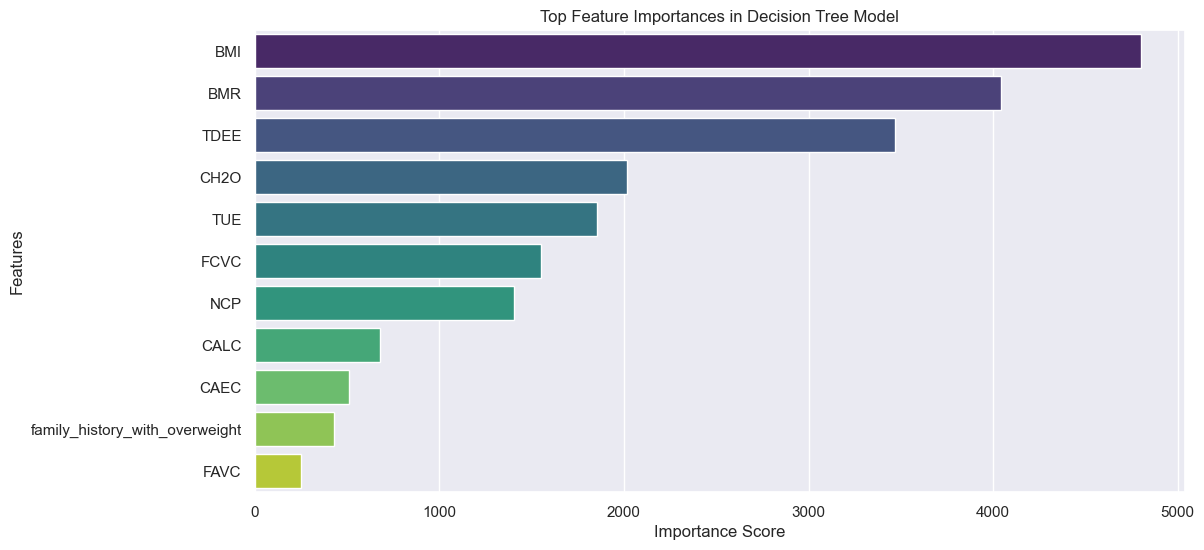

In [438]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top Feature Importances in Decision Tree Model")
plt.show()

In [393]:
X = df.drop(columns=['NObeyesdad','id','SMOKE','MTRANS'])
y = df['NObeyesdad']
numerical_features = list(X.select_dtypes('number').columns)
cat_features = list(X.select_dtypes('object').columns)


In [394]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42,stratify=y,shuffle=True)

In [317]:
x_train_transformed = preprocessor.fit_transform(x_train)

# Convert back to DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=numerical_features + catgorical_features)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
x_test_transformed = preprocessor.transform(x_test)

# Convert back to DataFrame
x_test_transformed = pd.DataFrame(x_test_transformed, columns=numerical_features + cat_features)
# y_test encoding
y_test_encoded = label_encoder.transform(y_test)


IndexError: index 14 is out of bounds for axis 0 with size 14

In [ ]:
lgbm_n = LGBMClassifier(class_weight='balanced')

In [ ]:
ML_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lgbm',lgbm_n)
])
lgbm_n.fit(x_train_transformed,y_train_encoded)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3040
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 20
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


LGBMClassifier(class_weight='balanced')

In [318]:
y_pred_best = lgbm_n.predict(x_test_transformed)

accuracy = accuracy_score(y_test_encoded, y_pred_best)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(confusion_matrix(y_test_encoded, y_pred_best))
print(classification_report(y_test_encoded, y_pred_best))

LightGBMError: The number of features in data (13) is not the same as it was in training data (20).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.